# Interpreting CNN predictions 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os

PATH = os.path.abspath('..')

%matplotlib inline

In [2]:
preds = pd.read_csv(f'{PATH}/results/predictions/best_xGASS-34.csv', index_col=0)
preds.sample(3)

,fgas_pred,fgas_true
GASS,,
108114,-1.371270,-1.724735
109005,-1.080937,-1.566703
112002,-1.179439,-1.054005


In [3]:
data = pd.read_csv(f'{PATH}/data/xGASS_representative_sample.csv', index_col=0)
data.sample(3)

,AGCnr,SDSS,PLATEID,MJD,FIBERID,RA,DEC,zSDSS,Dlum,lgMstar,...,lgGF,HIconf_flag,weight,group_id_B,NYU_id,env_code_B,Ngal_B,yang_shred_code,logMh_Mst_B,lvir_ratB
GASS,,,,,,,,,,,,,,,,,,,,,
114044,240062,J140452.67+213800.6,2771,54527,414,211.21948,21.63351,0.016504,71.6,10.024551,...,-0.830,0.0,0.655,437308,2318405,1,1,0,0.0000,-99.000000
52297,717099,J085724.03+204237.9,2282,53683,137,134.35014,20.71053,0.032830,144.1,10.490000,...,-1.025,0.0,0.712,398565,2133389,1,1,0,11.9199,-3.829140
18482,224943,J123053.16+090456.9,1232,52731,126,187.72153,9.08249,0.039310,173.4,10.430000,...,-1.701,-99.0,0.712,7993,1332892,2,4,0,12.2386,-0.553748


In [4]:
# get Δfgas
preds['d_fgas'] = preds.fgas_pred - preds.fgas_true

In [5]:
# combine dataframes
df = preds.join(data, on='GASS', how='left')
df.sample(5)

,fgas_pred,fgas_true,d_fgas,AGCnr,SDSS,PLATEID,MJD,FIBERID,RA,DEC,...,lgGF,HIconf_flag,weight,group_id_B,NYU_id,env_code_B,Ngal_B,yang_shred_code,logMh_Mst_B,lvir_ratB
GASS,,,,,,,,,,,,,,,,,,,,,
24437,-1.197277,-0.424000,-0.773277,220898,J123949.27+133256.8,1616,53169,576,189.95530,13.54912,...,-0.424,1.0,0.712,8480,1267489,0,4,0,13.1026,-0.776033
27260,-1.148716,-0.912000,-0.236716,985,J012523.68+143111.9,425,51884,355,21.34867,14.51999,...,-0.912,0.0,0.202,63316,151363,1,1,0,12.9095,-4.045582
109005,-1.080937,-1.566703,0.485766,0,J093505.80+093857.2,1303,53050,549,143.77419,9.64923,...,-1.567,-99.0,1.769,225947,1074306,1,1,0,0.0000,-99.000000
114036,-1.432977,-1.770509,0.337532,0,J142750.81+255017.0,2135,53827,385,216.96172,25.83808,...,-1.771,-99.0,0.564,220,1980409,0,39,0,12.9812,-0.436732
108093,-1.203194,-0.912500,-0.290694,0,J083530.18+234034.3,1929,53349,522,128.87576,23.67621,...,-0.913,0.0,1.308,16238,1876774,0,3,0,11.8832,-0.328671


See http://xgass.icrar.org/assets/data/xGASS_representative_sample.readme for details

In [6]:
df.columns

Index(['fgas_pred', 'fgas_true', 'd_fgas', 'AGCnr', 'SDSS', 'PLATEID', 'MJD',
       'FIBERID', 'RA', 'DEC', 'zSDSS', 'Dlum', 'lgMstar', 'expAB_r',
       'model_r', 'merr_r', 'ext_r', 'petrR50_r', 'petrR90_r', 'petrR50_z',
       'lgmust', 'CINDX', 'INCL', 'NUVr', 'lgSFR_tot_median', 'SFR_best',
       'SFRerr_best', 'SFRcase_best', 'HIsrc', 'HI_FLAG', 'xGASSDR', 'zHI',
       'W50cor', 'lgMHI', 'lgGF', 'HIconf_flag', 'weight', 'group_id_B',
       'NYU_id', 'env_code_B', 'Ngal_B', 'yang_shred_code', 'logMh_Mst_B',
       'lvir_ratB'],
      dtype='object')

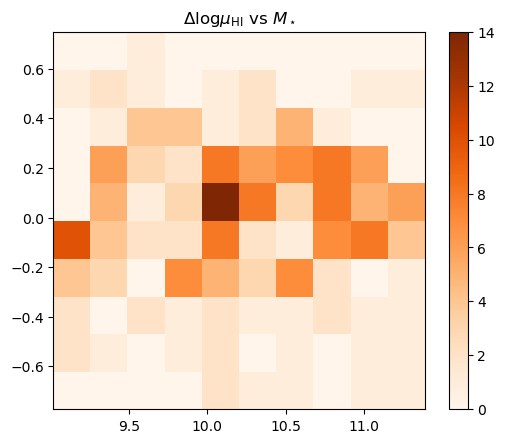

In [7]:
plt.figure(figsize=(6, 5), dpi=100)
plt.title(r'$\Delta \log\mu_{\rm HI}$ vs $M_\star$')
plt.hist2d(df.lgMstar, df.d_fgas, cmap='Oranges', bins=10);
plt.colorbar()

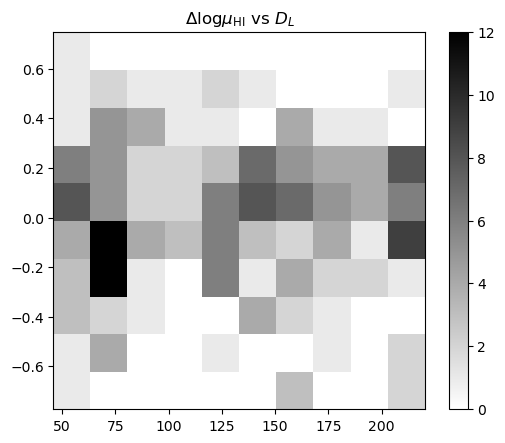

In [8]:
plt.figure(figsize=(6, 5), dpi=100)
plt.title(r'$\Delta\log \mu_{\rm HI}$ vs $D_L$')
plt.hist2d(df.Dlum, df.d_fgas, cmap='binary', bins=10);
plt.colorbar()

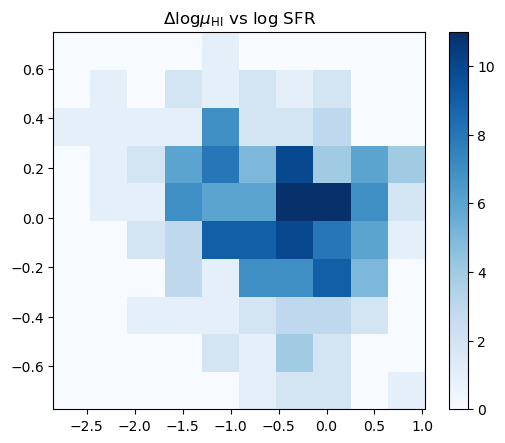

In [9]:
plt.figure(figsize=(6, 5), dpi=100)
plt.title(r'$\Delta \log \mu_{\rm HI}$ vs log SFR')
plt.hist2d(np.log10(df[df.SFR_best > 0].SFR_best), df[df.SFR_best > 0].d_fgas, cmap='Blues', bins=10);
plt.colorbar()

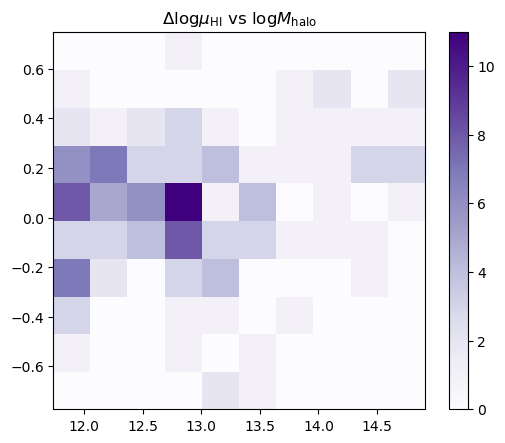

In [10]:
plt.figure(figsize=(6, 5), dpi=100)
plt.title(r'$\Delta \log \mu_{\rm HI}$ vs $\log M_{\rm halo}$')
plt.hist2d(df[df.logMh_Mst_B > 0].logMh_Mst_B, df[df.logMh_Mst_B > 0].d_fgas, cmap='Purples', bins=10);
plt.colorbar()

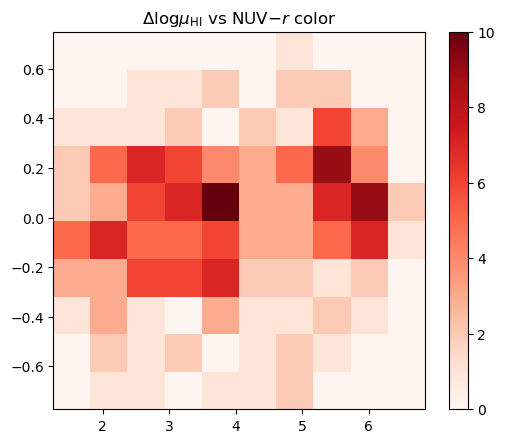

In [11]:
plt.figure(figsize=(6, 5), dpi=100)
plt.title(r'$\Delta \log \mu_{\rm HI}$ vs NUV$-r$ color')
plt.hist2d(df[df.NUVr > -10].NUVr, df[df.NUVr > -10].d_fgas, cmap='Reds', bins=10);
plt.colorbar()

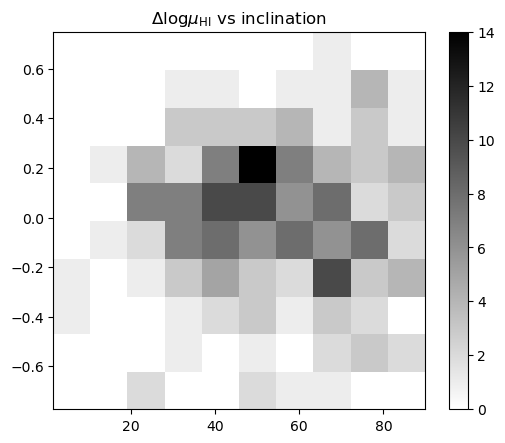

In [12]:
plt.figure(figsize=(6, 5), dpi=100)
plt.title(r'$\Delta \log \mu_{\rm HI}$ vs inclination')
plt.hist2d(df.INCL, df.d_fgas, cmap='binary', bins=10);
plt.colorbar()

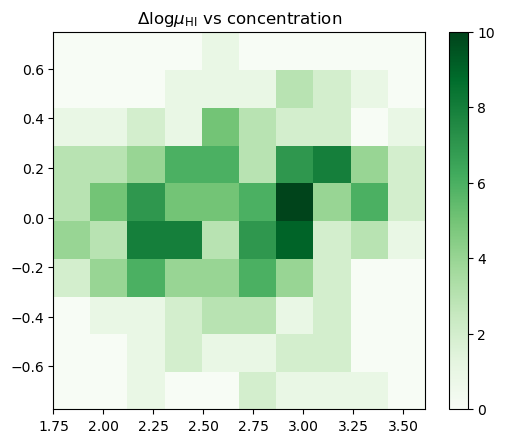

In [13]:
plt.figure(figsize=(6, 5), dpi=100)
plt.title(r'$\Delta \log \mu_{\rm HI}$ vs concentration')
plt.hist2d(df.CINDX, df.d_fgas, cmap='Greens', bins=10);
plt.colorbar()

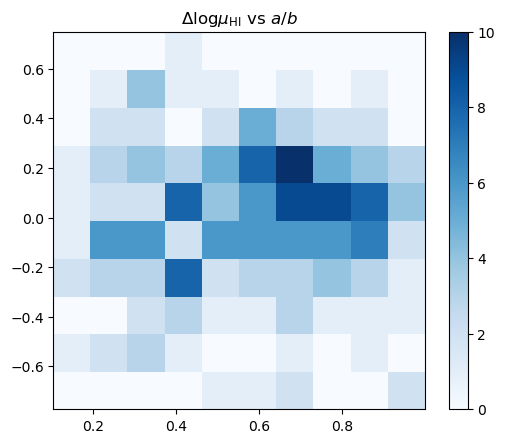

In [14]:
plt.figure(figsize=(6, 5), dpi=100)
plt.title(r'$\Delta \log \mu_{\rm HI}$ vs $a/b$')
plt.hist2d(df.expAB_r, df.d_fgas, cmap='Blues', bins=10);
plt.colorbar()


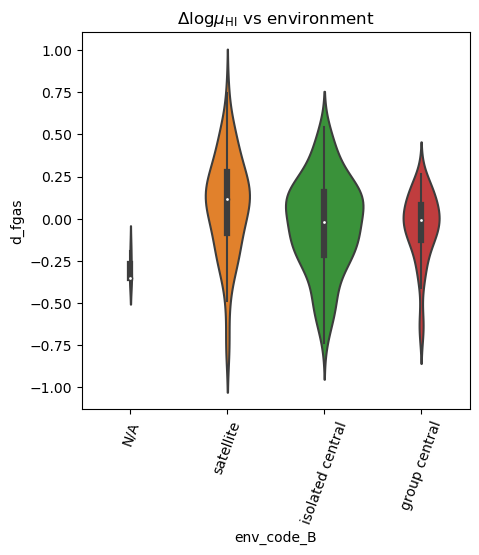

In [16]:
plt.figure(figsize=(5, 5), dpi=100)
plt.title(r'$\Delta \log \mu_{\rm HI}$ vs environment')

sns.violinplot(x='env_code_B', y='d_fgas', data=df, scale='count')
plt.xticks(range(4), ['N/A', 'satellite', 'isolated central', 'group central'], rotation=70);